# LR on MNIST DATA

In [34]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [47]:
# Load MNIST dataset into training and testing variables
# x_train, x_test: image data (28x28 grayscale) &  y_train, y_test: labels (0 through 9)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape # 60,000 images of size 28x28

(60000, 28, 28)

In [37]:
x_train[0] # first training image (28x28 pixel matrix)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [38]:
y_train.shape # shape of training labels (60000 labels). As y is the labels for images

(60000,)

In [39]:
y_train[:10] #first 10 training labels.

#5 is the label for the first image above in the training data. label is the value inside the image

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Flattening images data

reshape() => reshaping the image to 1D

In [40]:
# Flatten the 28x28 images into 1D vectors of 784 pixels (28 * 28 = 784)

x_train_final = x_train.reshape((-1, 784)) #-1: 60000 images , each image in 1D vector
x_train_final.shape


(60000, 784)

In [41]:
x_train_final[0] # first image after reshaping: flattened image vector (1D array of 784 values)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

Do the same for testing data: reshaping

In [42]:
x_test_final = x_test.reshape((-1, 784)) #-1 for autodetect the number of data

x_test_final.shape

(10000, 784)

10000 testing, 60000 training

## Normalization

Because some of the data values are too small and some are large.

0-255 the maximum value the image pixels are.

In [43]:
# Normalize pixel values from [0, 255] to [0, 1]

x_train_final = x_train_final / 255
x_test_final = x_test_final / 255

x_train_final

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Training the model

In [44]:
model = Sequential([
    # Four layers for the model:

    # Input Layer: 512 neurons, accepting 784-pixel flattened images, followed by Batch Normalization, ReLU activation, and 40% Dropout.
    Dense(512, input_shape=(784,)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),

    #Hidden Layer 1: 256 neurons, with Batch Normalization, ReLU activation, and 30% Dropout.
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    # Hidden Layer 2: 128 neurons, with Batch Normalization, ReLU activation, and 20% Dropout.
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    #Output Layer: 10 neurons (one per digit) with softmax activation for multi-class classification.
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_final, y_train_final,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.7975 - loss: 0.6639 - val_accuracy: 0.9597 - val_loss: 0.1330 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9444 - loss: 0.1887 - val_accuracy: 0.9675 - val_loss: 0.1079 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9552 - loss: 0.1473 - val_accuracy: 0.9738 - val_loss: 0.0881 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9644 - loss: 0.1145 - val_accuracy: 0.9760 - val_loss: 0.0806 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9684 - loss: 0.0998 - val_accuracy: 0.9758 - val_loss: 0.0816 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9729 - loss: 0.0856 - val_accuracy: 0.9787 - val_loss: 0.0740 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9748 - loss:

Validation accuracy was 92%.

Improved validation accuracy is 98


# Evaluation the model

In [45]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_final, y_test_final, verbose=0)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")


Test Accuracy: 98.39%


# Plot Loss & Accuracy Curves

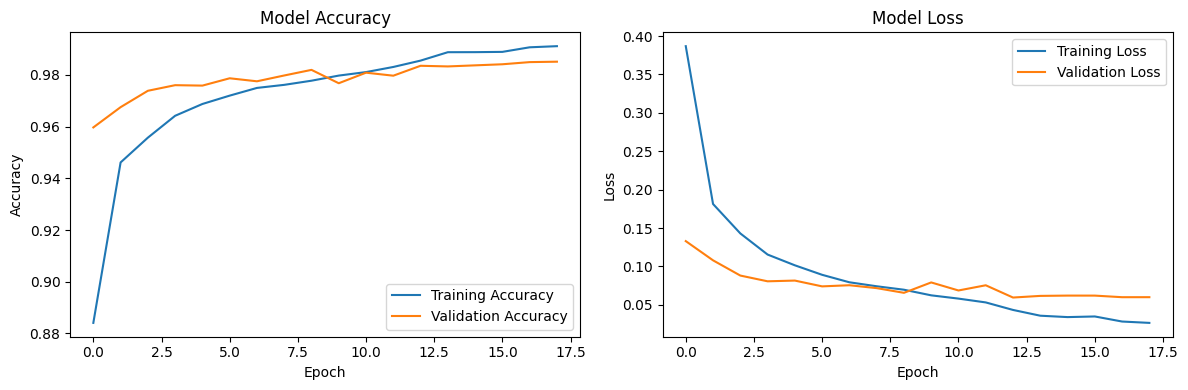

In [46]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Task: improve the model accuracy Done

In [26]:
"""model = Sequential()
model.add(Dense(10, input_shape=(784,))) # Add a Dense layer with 10 neurons (for 10 classes in the data) and input shape of 28*28=784
model.add(Activation('softmax')) # Apply softmax activation to output probabilities for each digit class (0–9)

# model = keras.Sequential(keras.layers.Dense(10, input_shape=(784,), activation='softmax'))

# Compile the model: training process parameters

model.compile(
    optimizer='sgd',                               # SGD (Stochastic Gradient Descent) optimizer
    loss='sparse_categorical_crossentropy',        # for multi classification as we have 10 neurons/classes and we need to get one result for each class
    metrics=['accuracy']                           # Track accuracy during training and evaluation
)

results = model.fit(
  x=x_train_final,              # Flattened and normalized input images
  y=y_train,                      # Integer labels (0–9)
  shuffle=True,                        #change in the data in each epoch to make the model learn not save
  epochs=1000,                      # Train for 30 full passes over the dataset
  batch_size=128,                   # Use mini-batches of 16 samples for each update
  validation_data=(x_test_final, y_test)  # Use test set for real-time validation before the full testing
)

eval = model.evaluate(x=x_test_final, y=y_test)

# Predict the probabilities for all training samples, Each row contains 10 probabilities (one per class)
new = model.predict(x_train_final)

# predicted probability distribution for the first sample
new[0] #10 outputs as one output for each neuron
"""